### Problem Statement

You are a data scientist / AI engineer working on a classification problem to predict the weather type based on various weather-related features. You have been provided with a dataset named **`"weather_classification_data.csv"`**, which includes several parameters affecting weather conditions. The dataset comprises the following columns:

- temperature: The temperature in degrees Celsius.
- humidity: The humidity percentage.
- wind_speed: The wind speed in kilometers per hour.
- precipitation (%): The precipitation percentage.
- cloud_cover: The cloud cover description.
- atmospheric_pressure: The atmospheric pressure in hPa.
- uv_index: The UV index.
- season: The season during which the data was recorded.
- visibility (km): The visibility in kilometers.
- location: The type of location where the data was recorded.
- weather_type: The target variable for classification, indicating the weather type (Rainy, Sunny, Cloudy, Snowy).
  
Your task is to use this dataset to build and evaluate machine learning models to predict the weather type based on the given parameters. You will perform data preprocessing, exploratory data analysis, and model training using Support Vector Machine (SVM) with different kernels.

Dataset credits: Nikhil Narayan (https://www.kaggle.com/datasets/nikhil7280/weather-type-classification)

**Import Necessary Libraries**

In [157]:
# Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

### Task 1: Data Preparation and Exploration

1. Import the data from the `"weather_data.csv"` file and store it in a DataFrame.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to understand its structure.
4. Check for any missing values in the dataset and handle them appropriately.
5. Visualize the distribution of key features using appropriate charts:
    - Visualize `season` using a pie chart.
    - Visualize `temperature, humidity, and wind_speed` using histograms.
    - Visualize `precipitation (%)` using a box plot.

In [158]:
# Step 1: Import the data from the "weather_data.csv" file
df = pd.read_csv('weather_classification_data.csv')

# Step 2: Display the number of rows and columns in the dataset
df.shape

# Step 3: Display the first few rows of the dataset to understand its structure.
df.head()

,temperature,humidity,wind_speed,precipitation (%),cloud_cover,atmospheric_pressure,uv_index,season,visibility (km),location,weather_type
0,14,73,9.5,82,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39,96,8.5,71,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30,64,7.0,16,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38,83,1.5,82,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27,74,17.0,66,overcast,990.67,1,Winter,2.5,mountain,Rainy


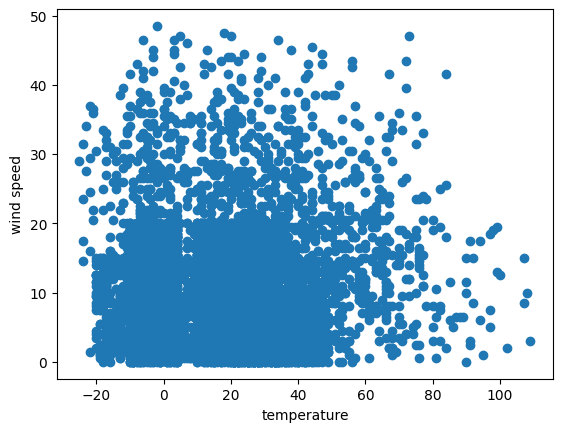

In [159]:
# Step 4: Visualize the distribution of key features
plt.scatter(df['temperature'], df['wind_speed']);
plt.xlabel('temperature');
plt.ylabel('wind speed');

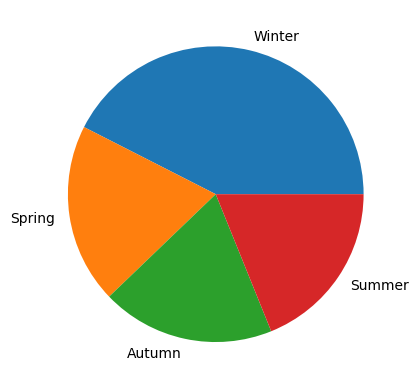

In [160]:
# Visualize season using a pie chart
plt.pie(df['season'].value_counts(), labels=df['season'].value_counts().index);

Text(0.5, 1.0, 'weather info')

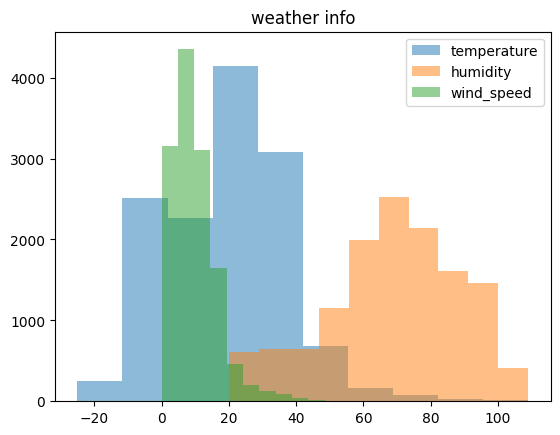

In [161]:
# Visualize temperature, humidity, and wind_speed using histograms
plt.hist(df['temperature'], alpha=0.5, label='temperature')
plt.hist(df['humidity'], alpha=0.5, label='humidity')
plt.hist(df['wind_speed'], alpha=0.5, label='wind_speed')
plt.legend() # Need to call this in order to show the labels.
plt.title('weather info')

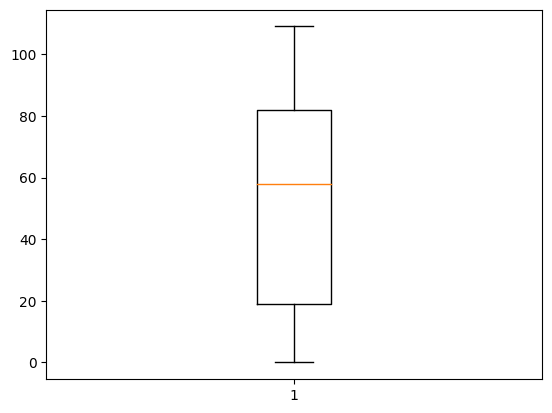

In [162]:
# Visualize precipitation (%) using a box plot
plt.boxplot(df['precipitation (%)']);

### Task 2: Data Transformation

1. Encode cloud_cover, location and season using one-hot encoding.
2. Scale the numerical features (temperature, humidity, wind_speed, precipitation (%), atmospheric_pressure, uv_index, visibility (km)) using StandardScaler.
3. Display the first few rows of the updated dataset.

In [163]:
# Step 1: Encode cloud_cover, location and season using one-hot encoding.
# For one hot encoding we can use get_dummies() function
df = pd.get_dummies(df, columns=['cloud_cover', 'location', 'season'], drop_first=True)
df

,temperature,humidity,wind_speed,precipitation (%),atmospheric_pressure,uv_index,visibility (km),weather_type,cloud_cover_cloudy,cloud_cover_overcast,cloud_cover_partly cloudy,location_inland,location_mountain,season_Spring,season_Summer,season_Winter
0,14,73,9.5,82,1010.82,2,3.5,Rainy,0,0,1,1,0,0,0,1
1,39,96,8.5,71,1011.43,7,10.0,Cloudy,0,0,1,1,0,1,0,0
2,30,64,7.0,16,1018.72,5,5.5,Sunny,0,0,0,0,1,1,0,0
3,38,83,1.5,82,1026.25,7,1.0,Sunny,0,0,0,0,0,1,0,0
4,27,74,17.0,66,990.67,1,2.5,Rainy,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10,74,14.5,71,1003.15,1,1.0,Rainy,0,1,0,0,1,0,1,0
13196,-1,76,3.5,23,1067.23,1,6.0,Snowy,1,0,0,0,0,0,0,1
13197,30,77,5.5,28,1012.69,3,9.0,Cloudy,0,1,0,0,0,0,0,0
13198,3,76,10.0,94,984.27,0,2.0,Snowy,0,1,0,1,0,0,0,1


In [184]:
# Step 2: Scale the numerical features
scaler = MinMaxScaler()
df_numeric_columns = df.select_dtypes(include=['int64', 'float']).columns

scaled = scaler.fit_transform(df[df_numeric_columns])
df_scaled = pd.DataFrame(scaled)

df[df_numeric_columns] = df_scaled

df

,temperature,humidity,wind_speed,precipitation (%),atmospheric_pressure,uv_index,visibility (km),weather_type,cloud_cover_cloudy,cloud_cover_overcast,cloud_cover_partly cloudy,location_inland,location_mountain,season_Spring,season_Summer,season_Winter
0,0.291045,0.595506,0.195876,0.752294,0.527951,0.142857,0.175,Rainy,0,0,1,1,0,0,0,1
1,0.477612,0.853933,0.175258,0.651376,0.529480,0.500000,0.500,Cloudy,0,0,1,1,0,1,0,0
2,0.410448,0.494382,0.144330,0.146789,0.547746,0.357143,0.275,Sunny,0,0,0,0,1,1,0,0
3,0.470149,0.707865,0.030928,0.752294,0.566614,0.500000,0.050,Sunny,0,0,0,0,0,1,0,0
4,0.388060,0.606742,0.350515,0.605505,0.477461,0.071429,0.125,Rainy,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,0.261194,0.606742,0.298969,0.651376,0.508732,0.071429,0.050,Rainy,0,1,0,0,1,0,1,0
13196,0.179104,0.629213,0.072165,0.211009,0.669298,0.071429,0.300,Snowy,1,0,0,0,0,0,0,1
13197,0.410448,0.640449,0.113402,0.256881,0.532637,0.214286,0.450,Cloudy,0,1,0,0,0,0,0,0
13198,0.208955,0.629213,0.206186,0.862385,0.461425,0.000000,0.100,Snowy,0,1,0,1,0,0,0,1


In [165]:
# Step3: Display the first few rows of the updated dataset.
df_scaled.head()


,temperature,humidity,wind_speed,precipitation (%),atmospheric_pressure,uv_index,visibility (km)
0,0.291045,0.595506,0.195876,0.752294,0.527951,0.142857,0.175
1,0.477612,0.853933,0.175258,0.651376,0.529480,0.500000,0.500
2,0.410448,0.494382,0.144330,0.146789,0.547746,0.357143,0.275
3,0.470149,0.707865,0.030928,0.752294,0.566614,0.500000,0.050
4,0.388060,0.606742,0.350515,0.605505,0.477461,0.071429,0.125


### Task 3: Model Training Using SVM with Linear Kernel

1. Select the features and the target variable for modeling.
2. Split the data into training and test sets with a test size of 30%.
3. Initialize and train an SVM model with a linear kernel using the training data.
4. Print the model's accuracy score on test data.
5. Evaluate the model using a classification report and confusion matrix.

In [166]:
# Step 1: Select features and target variable


# Step 2: Split the data


In [167]:
# Step 3: Train SVM with linear kernel


# Step 4: Print accuracy score



In [168]:
# Step 5: Evaluate the model


#classification report



#confusion matrix



### Task 4: Model Training Using SVM with RBF Kernel

1. Initialize and train an SVM model with an RBF kernel using the training data.
2. Print the model's accuracy score on test data.
3. Evaluate the model using a classification report and confusion matrix.

In [169]:
# Step 1: Train SVM with RBF kernel



# Step 2: Print accuracy score




# Step 3: Evaluate the model

#classification report



#confusion matrix



### Task 5: Experiment with Hyperparameters in SVM

1. Train an SVM model with an RBF kernel and the following hyperparameters:
    - C=0.5
    - gamma='auto'
    - kernel='rbf'
    - degree=2
      
Learn about these parameters here: [SVC Parameters](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

--------------------------------------------------------------------------------------------------------------------------------------------------------

2. Print the model's accuracy score on test data.
3. Evaluate the model using a classification report and confusion matrix.

In [170]:
# Step 1: Train the SVM model with specified hyperparameters


# Step 2: Print the model's accuracy score



# Step 3: Make predictions on the test set



# Step 4: Evaluate the model using a classification report and confusion matrix


#classification report



#confusion matrix



### Task 6: Implementing Sklearn Pipeline

1. Create a pipeline that includes the StandardScaler and the SVM model with an RBF kernel.
2. Train the pipeline using the training data.
3. Evaluate the pipeline using the test data and print the classification report.

In [171]:
# Create a pipeline with two steps: scaling and SVM with RBF kernel


# Fit the pipeline on the training data


# Make predictions using the pipeline on the test data


# Print the classification report for the pipeline model


# Print the confusion matrix for the pipeline model
